# Classical and quantum dynamics of electrons in open stadium billiards

In [4]:
!conda activate env-tkwant
!python --version

Python 3.7.9


In [5]:
import kwant
import tkwant
from tkwant import onebody
import scipy
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sig

### Geometry of the device

In [7]:
"Stadium"
def stadium(length, radius):
    def geom(pos):
        x, y = pos
        return np.logical_or( np.logical_or((x-length/2)**2+y**2<(radius)**2, (x+length/2)**2+y**2<(radius)**2 ) , np.logical_and( np.abs(y)<radius, np.abs(x)<length/2) )
    return geom

## Parameters of the experiment

### Scaling

In [8]:
"""
All the parameters are set to 1 as they are considered as undimensional

"""

asquare = 1. # arbitrary units
tsquare = 1. # arbitrary units
scaling = 1. # scaling factor

"""scaling"""
a = asquare * scaling
t = tsquare / scaling**2

### Fermi energy, velocity and wavelength

In [9]:
"Fermi energy"
Ef = 0.3106*t   # Chosen Fermi energy [eV]
"The wavevector only depends on Ef, t and a as:"
k_F = np.sqrt(Ef/(t*a**2)) # Wavevector
print("k_F = ", k_F)
print("E_F = ", Ef)

k_F =  0.5573149917237109
E_F =  0.3106


### Verifying of the conditions

In [10]:
""" The wavelength must be (much more) larger than the lattice parameter """
lambda_F = 2 * np.pi * a * np.sqrt(t / Ef) 
print("\lambda_F = ", lambda_F)
if lambda_F/a < 2:
    print('Warning : lambda_F must be larger than the lattice parameter a')
    
""" The Fermi energy must be smaller than the hopping parameter t"""
print("E_F = ", Ef)
if Ef/t > 0.5:
    print('Warning : E_F must be smaller than the hopping parameter t')

\lambda_F =  11.274028871440223
E_F =  0.3106


### Defining a smooth potential

In [11]:
def smooth_pot(site, effrad, radius, length, H):
    x, y = site.pos
    if ( abs(y) < radius and abs(x) < length/2 ):
        pot = H* (y**2 -effrad**2) / (radius**2-effrad**2)
    elif ( x > 0 ):
        pot = H* ( (x-length/2)**2+y**2 -effrad**2 ) / (radius**2-effrad**2)
    elif ( x < 0 ): 
        pot = H* ( (x+length/2)**2+y**2 -effrad**2 ) / (radius**2-effrad**2)
    if ( (x-length/2)**2+y**2<effrad**2 or (x+length/2)**2+y**2<(effrad)**2 or ( np.abs(y)<effrad and np.abs(x)<length/2) ):
        pot = 0
    return pot

### Conduction band is shifted with respect to the Fermi energy defined at E = 0

In [12]:
def onsite(site):
    """
    Definition of the potential. To reach the bottom of the conduction band, the potential is set at 4*t.
    The conduction band is further shifted by Ef since the Fermi energy is defined at E = 0.
    
    """
    (x, y) = site.pos
    return 4*t - Ef

#### The hopping parameter

In [13]:
def hopping(site_i, site_j):
    return -t

## Building the system

In [14]:
" Parameters " 
radius = 4*lambda_F       # in [nm]
length = 2*radius    # distance between the two semicircles
print(length)
coeff = 0.6
effrad = coeff*radius
H = 0.1*t             # Potential height on the contour (in [eV])

90.19223097152178


In [15]:
def sys_builder(a):
    
    lat = kwant.lattice.square(a, norbs = 1) # norbs gives the number of orbitals per atom. It is needed to compute J

    sys = kwant.Builder() 
    
    sys[lat.shape(stadium(length, radius), (0,0))] = onsite    
    sys[lat.neighbors()] = hopping 

    sys = sys.finalized()
    
    return sys

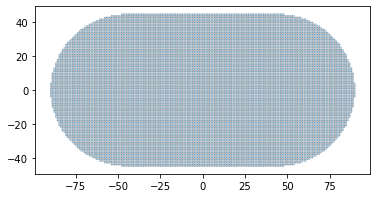

In [16]:
"Building and plotting the system"
sys = sys_builder(a)
figure = kwant.plot(sys)

In [21]:
import warnings
warnings.filterwarnings("ignore")

0


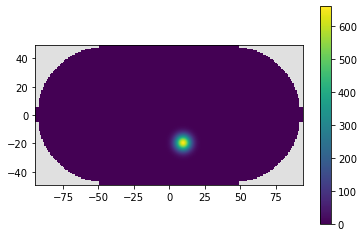

1


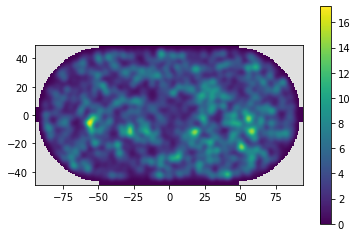

2


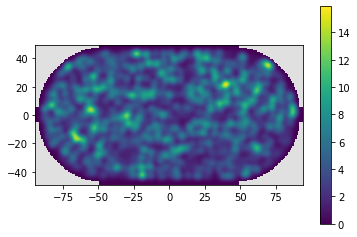

3


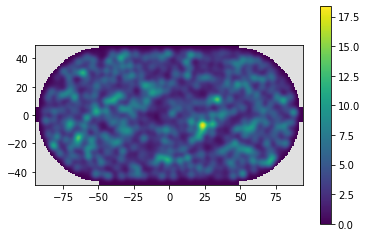

4


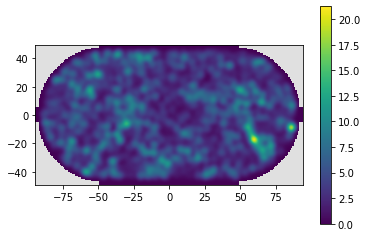

5


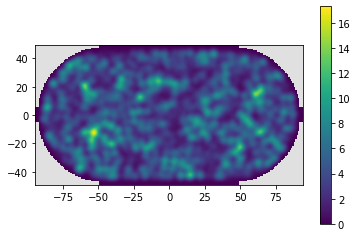

6


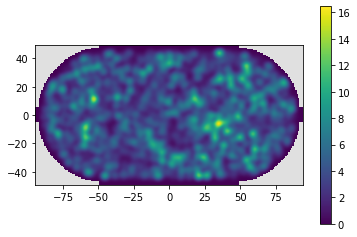

7


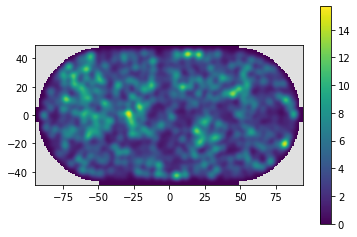

8


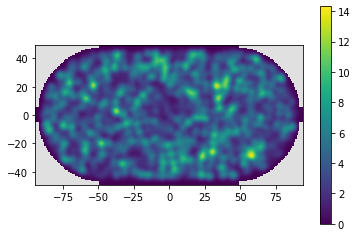

9


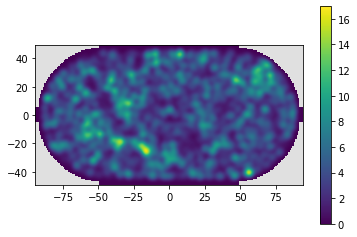

10


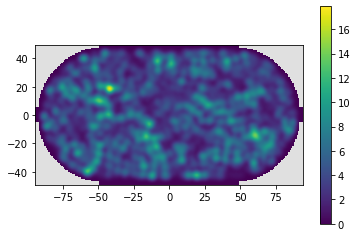

11


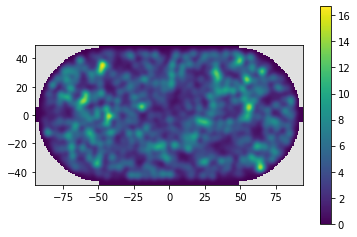

12


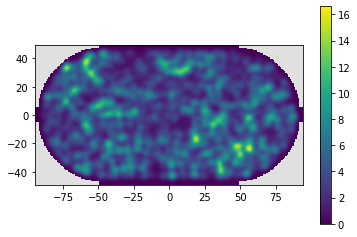

13


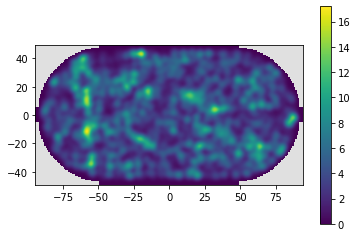

14


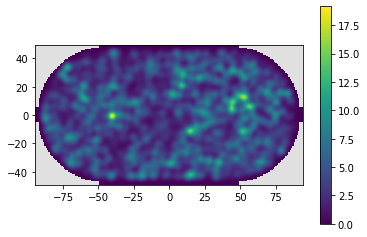

15


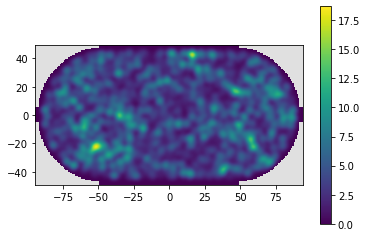

16


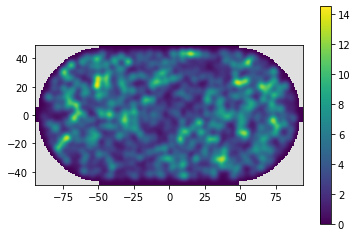

17


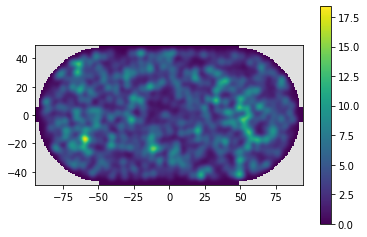

18


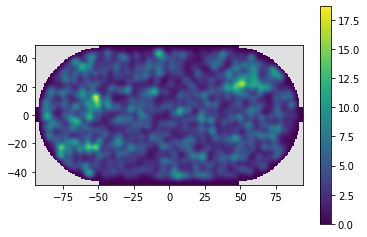

19


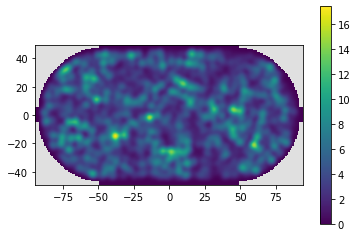

20


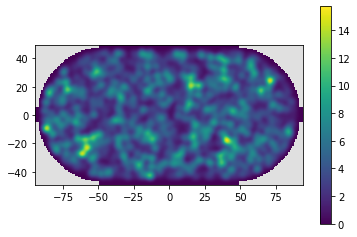

21


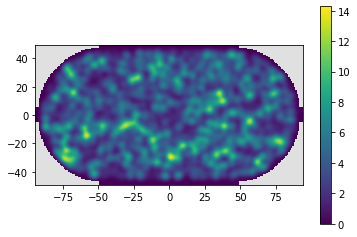

22


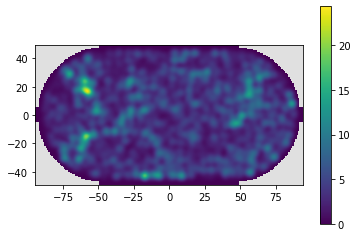

23


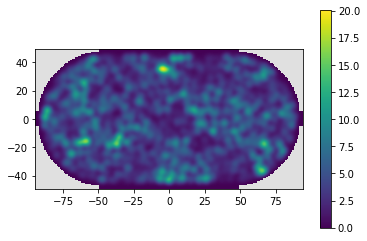

24


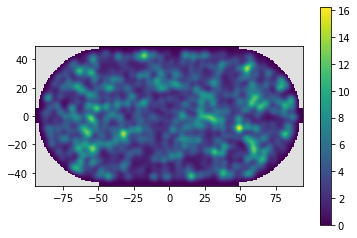

25


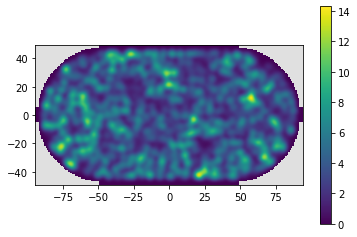

26


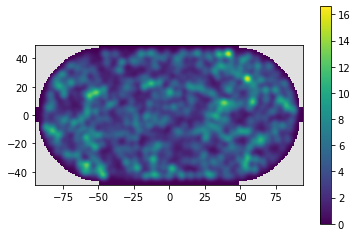

27


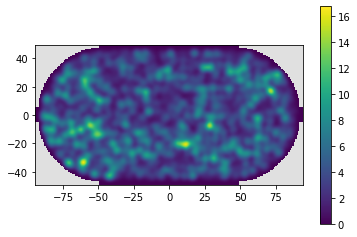

28


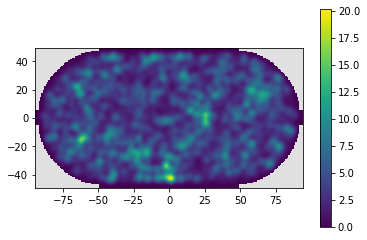

29


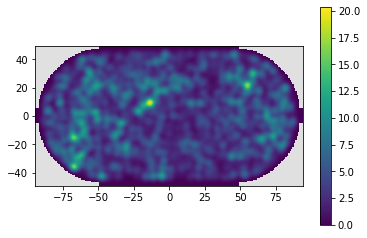

30


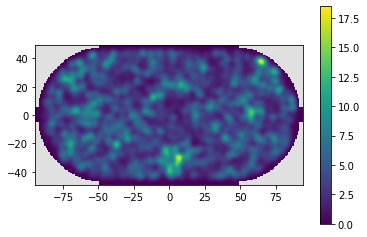

31


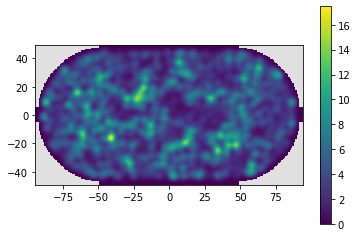

32


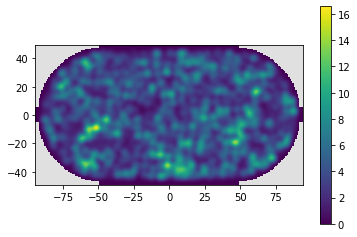

33


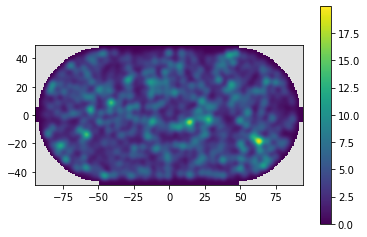

34


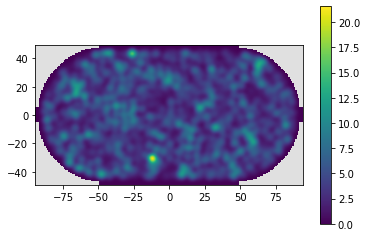

35


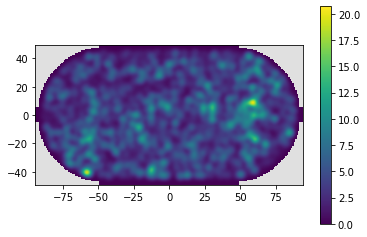

36


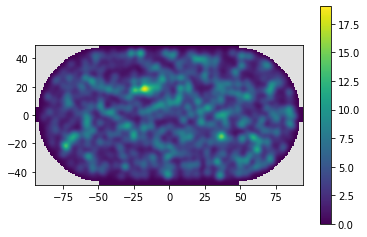

37


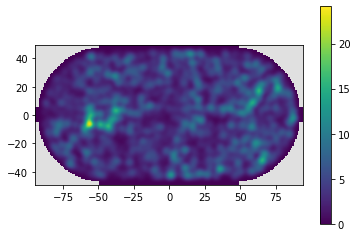

38


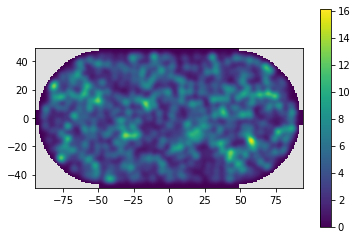

39


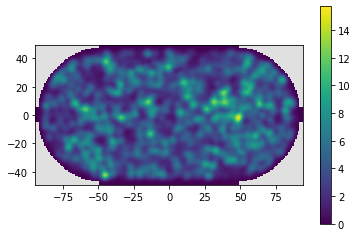

In [40]:
# We build a 2xN array with the coordinates of all sites (x and y positions)
ri = np.array([[site.pos[0], site.pos[1]] for site in sys.sites])

# We define a time vector
times = np.linspace(0, 1000000, 40)

# We build the density observable using kwant
density_operator = kwant.operator.Density(sys)

""" 
Here, we define a wavepacket in the system with a given width, a departing position and an initial 
velocitity vector defined by a norm (the velocity) and a direction (an angle).

"""

# Velocity of the wavepacket
velocity = 1
# The initial angle of the velocitiy vector
angle = 45
# Initial position of the wavepacket
inipos = [10, -20]
# Width of the wavepacket
widthWP = 10

# The wavevector k gives the orientation and the velocity (but not yet integrated here)
k = [np.pi / 6, np.pi / 6]
psi0 = np.exp(- ((ri[:,0] - inipos[0])**2 + (ri[:,1] - inipos[1])**2)/(widthWP**2/2) + 1j * np.dot(k, ri.T))

# Initialize the solver with the wave function defined at t=0
wave_func = onebody.WaveFunction.from_kwant(sys, psi0)

# loop over timesteps and plot the result
for i, time in enumerate(times):
    print(i)
    wave_func.evolve(time)
    density = wave_func.evaluate(density_operator)
    kwant.plotter.density(sys, 180 * density, cmap='viridis')
    plt.show()